(9)=
# Chapter 9: Plotting & Visualization

**Topics Covered:**
- Matplotlib basics for scientific plotting
- Advanced plotting techniques for chemical engineering data
- Molecular visualization with RDKit and Py3Dmol

## What Makes a Good Scientific Figure?

In science and engineering, figures are often the **first thing readers look at** — before even reading the text. A well-designed figure communicates your results clearly, while a poorly designed one can confuse, mislead, or undermine your credibility.

A good scientific figure should:
- **Stand on its own** — a reader should understand it without reading the surrounding text
- **Communicate one clear message** — avoid cramming too many ideas into a single plot

### Key Principles

| Principle | Why It Matters |
|-----------|---------------|
| **Appropriate plot type** | A bar chart for continuous data or a pie chart for comparisons can mislead. Match the plot to the data. |
| **Clear axis labels with units** | Without units, numbers are meaningless. Is it seconds or hours? Kelvin or Celsius? |
| **Readable font sizes** | If your audience has to squint, your figure has failed. Aim for 12+ pt for axis labels. |
| **Meaningful color choices** | Use color to convey information, not decoration. Avoid rainbow colormaps — they distort perception. |
| **No chartjunk** | Remove unnecessary 3D effects, excessive gridlines, and decorative elements that add no information. |
| **Legends and annotations** | When showing multiple datasets, always include a legend. Annotate key features when helpful. |
| **Error bars when applicable** | If your data has uncertainty, show it. Hiding uncertainty is misleading. |

Let's look at a concrete example. Below, we plot the **same dataset** — concentration of a reactant over time during a first-order reaction — two ways: poorly and properly.

**Bad Figure** — What NOT to do:

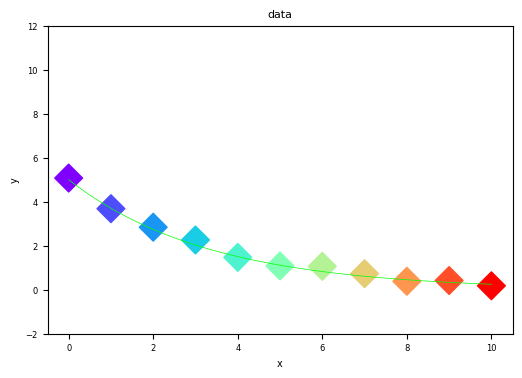

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data: first-order reaction, C(t) = C0 * exp(-k*t)
np.random.seed(42)
time_exp = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
C0, k = 5.0, 0.3
C_exp = C0 * np.exp(-k * time_exp) + np.random.normal(0, 0.15, len(time_exp))
C_model = C0 * np.exp(-k * np.linspace(0, 10, 100))

# --- BAD FIGURE ---
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(0, 10, 100), C_model, color='lime', linewidth=0.5)
plt.scatter(time_exp, C_exp, c=range(len(time_exp)), cmap='rainbow', s=200, marker='D')
plt.title('data', fontsize=8)
plt.xlabel('x', fontsize=7)
plt.ylabel('y', fontsize=7)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.ylim(-2, 12)  # misleading axis range — exaggerates empty space
plt.show()

Problems with this figure:
- **No meaningful axis labels** — "x" and "y" tell the reader nothing
- **No units** — is time in seconds, minutes, or hours?
- **Tiny fonts** — labels and tick marks are hard to read
- **Rainbow color scheme on scatter points** — color encodes nothing useful here (just index)
- **No legend** — what do the line and points represent?
- **Misleading y-axis range** — extends to -2 and 12, making the data look smaller than it is
- **Thin model line** — nearly invisible against the data

---

**Good Figure** — The same data, plotted properly:

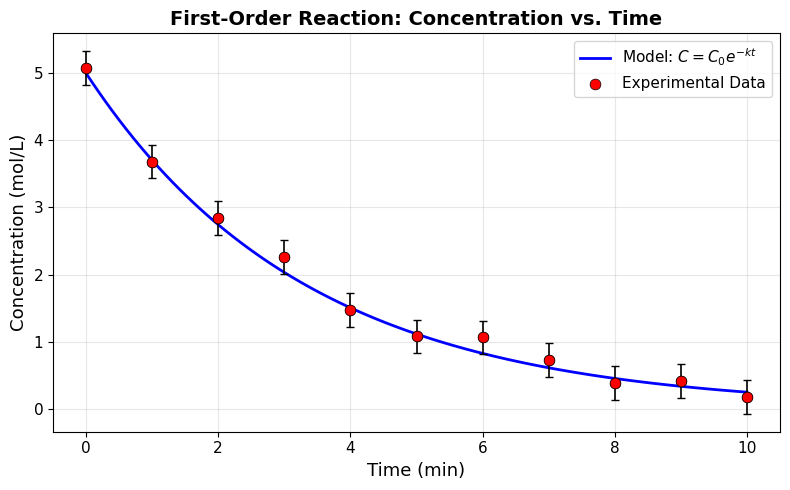

In [2]:
# --- GOOD FIGURE ---
# Same data as above
np.random.seed(42)
time_exp = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
C0, k = 5.0, 0.3
C_exp = C0 * np.exp(-k * time_exp) + np.random.normal(0, 0.15, len(time_exp))
time_model = np.linspace(0, 10, 100)
C_model = C0 * np.exp(-k * time_model)

noise_std = 0.25
yerr = np.full_like(C_exp, noise_std)


plt.figure(figsize=(8, 5))
plt.plot(time_model, C_model, 'b-', linewidth=2, label='Model: $C = C_0 e^{-kt}$')
plt.scatter(time_exp, C_exp, color='red', s=60, zorder=3, 
            edgecolors='black', linewidths=0.5, label='Experimental Data')

plt.errorbar(time_exp, C_exp, yerr=yerr,
             fmt='o', color='red', ecolor='black',
             elinewidth=1.2, capsize=3,
             markersize=7, markeredgecolor='black')

plt.xlabel('Time (min)', fontsize=13)
plt.ylabel('Concentration (mol/L)', fontsize=13)
plt.title('First-Order Reaction: Concentration vs. Time', fontsize=14, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

What makes this figure effective:
- **Descriptive axis labels with units** — "Time (min)" and "Concentration (mol/L)"
- **Readable font sizes** — 11-14 pt throughout
- **Distinct visual encoding** — solid blue line for model, red circles for data
- **Legend** — clearly identifies what each element represents
- **LaTeX in legend** — shows the mathematical model equation
- **Appropriate axis range** — matplotlib auto-scales to fit the data naturally
- **Subtle grid** — helps read values without cluttering the plot

### Quick Checklist for Scientific Figures

Before submitting any figure, ask yourself:

- [ ] Is the **plot type appropriate** for my data?
- [ ] Do both axes have **labels with units**?
- [ ] Is there a **legend** (if multiple datasets)?
- [ ] Are fonts **large enough to read**?
- [ ] Are **error bars** included (if uncertainty exists)?
- [ ] Is the **axis range reasonable** (not misleading)?
- [ ] **Could someone understand this figure without reading the text**?

---

(9.1)=
## 9.1 Matplotlib Basics

Matplotlib is the foundational plotting library in Python. It provides a MATLAB-like interface for creating high-quality visualizations.

```python
import matplotlib.pyplot as plt
```

In [4]:
import matplotlib.pyplot as plt



In [5]:
import matplotlib.pyplot as plt

plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

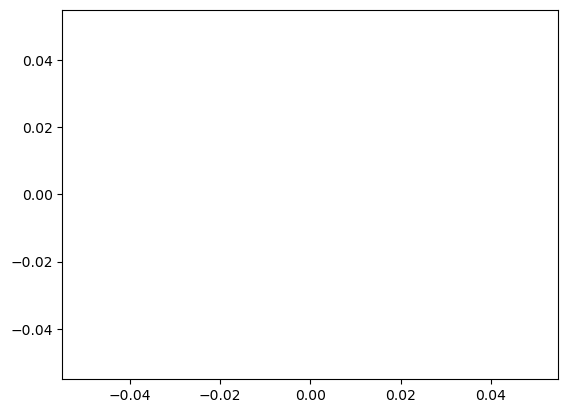

In [7]:
plt.plot()
plt.show()

### 9.1.1 First Plot - Line Graph

In [8]:
import numpy as np

# Create data
time = np.array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96969697,
        7.07070707,  7.17171717,  7.27272727,  7.37373737,  7.47474747,
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ])

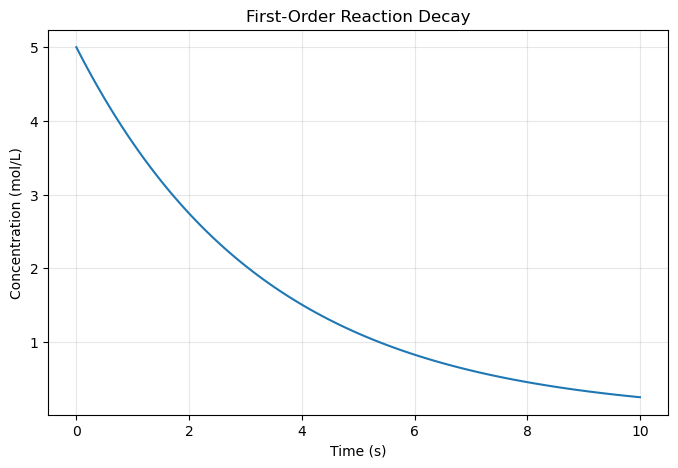

In [11]:
 #np.linspace(0, 10, 100)  # Time from 0 to 10 seconds
concentration = 5.0 * np.exp(-0.3 * time)  # First-order decay

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(time, concentration)
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/L)')
plt.title('First-Order Reaction Decay')
plt.grid(True, alpha=0.3)
plt.show()

### 9.1.2 Customizing Line Styles and Colors

**Colors**

| Code | Color |
|------|------|
| `'b'` | Blue |
| `'g'` | Green |
| `'r'` | Red |
| `'c'` | Cyan |
| `'m'` | Magenta |
| `'y'` | Yellow |
| `'k'` | Black |
| `'w'` | White |

**Line Styles**

| Code | Style |
|------|------|
| `'-'` | Solid |
| `'--'` | Dashed |
| `'-.'` | Dash-dot |
| `':'` | Dotted |
| `''` or `'None'` | No line |

**Combined Examples**

| Format String | Meaning |
|----------------|--------|
| `'r--'` | Red dashed line |
| `'g:'` | Green dotted line |
| `'b-.'` | Blue dash-dot |
| `'k-'` | Black solid |


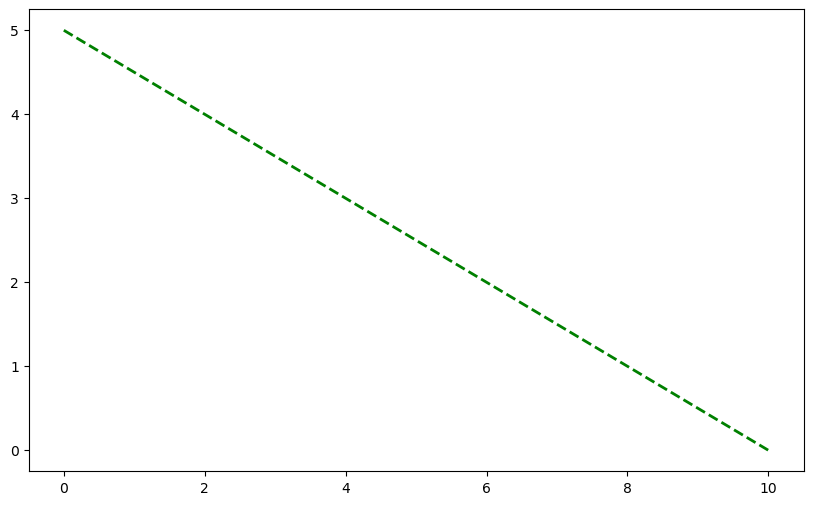

In [16]:
# Multiple reaction orders
# time = np.linspace(0, 10, 100)
C0 = 5.0  # Initial concentration

# Different reaction orders
C_zero_order = C0 - 0.5 * time

# Create plot with different line styles
plt.figure(figsize=(10, 6))
plt.plot(time, C_zero_order, 'g--', linewidth=2, label='Zero Order')


In [17]:
import matplotlib.colors as mcolors
print(mcolors.CSS4_COLORS)
print(list(mcolors.CSS4_COLORS.keys()))

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

In [18]:
time

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

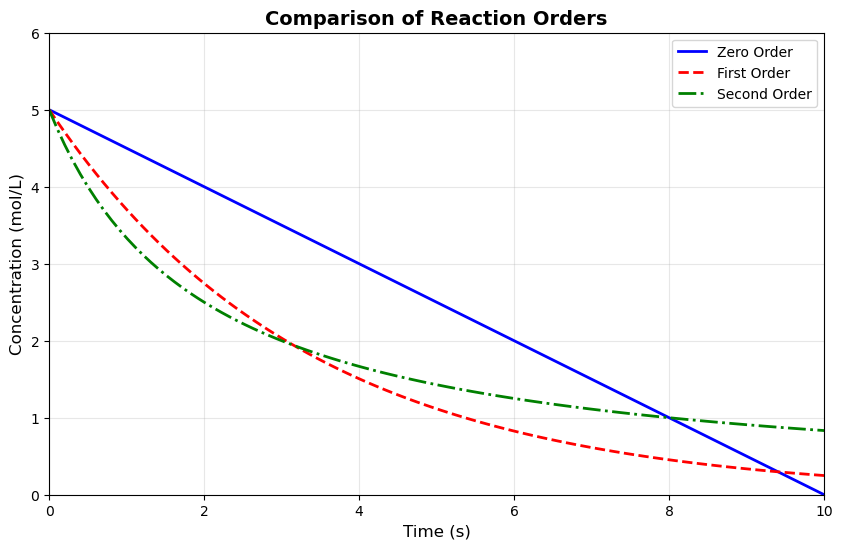

In [21]:
# Multiple reaction orders
# time = np.linspace(0, 10, 100)
C0 = 5.0  # Initial concentration

# Different reaction orders
C_zero_order = C0 - 0.5 * time
C_zero_order[C_zero_order < 0] = 0  # Concentration can't be negative

C_first_order = C0 * np.exp(-0.3 * time)

k2 = 0.1
C_second_order = C0 / (1 + C0 * k2 * time)

# Create plot with different line styles
plt.figure(figsize=(10, 6))
plt.plot(time, C_zero_order, 'b-', linewidth=2, label='Zero Order')
plt.plot(time, C_first_order, 'r--', linewidth=2, label='First Order')
plt.plot(time, C_second_order, 'g-.', linewidth=2, label='Second Order')

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Concentration (mol/L)', fontsize=12)
plt.title('Comparison of Reaction Orders', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 10)
plt.ylim(0, 6)
plt.show()

### 9.1.3 Scatter Plots

In [ ]:
plt.scatter(x_data, y_data, linestyling...)

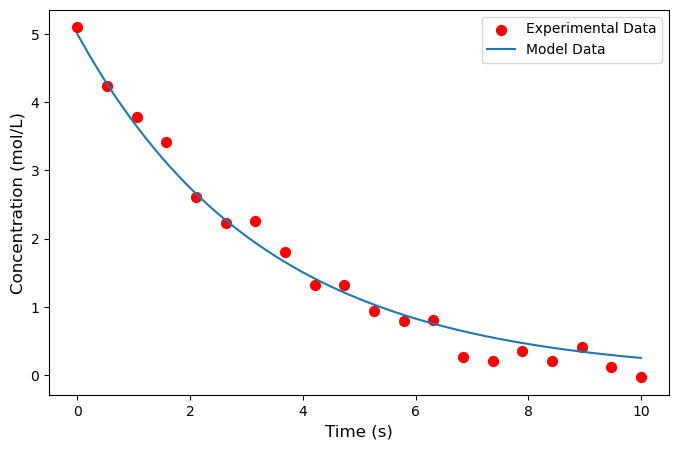

In [27]:
# Experimental data with noise
np.random.seed(42)
time_exp = np.array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])
C_exp = 5.0 * np.exp(-0.3 * time_exp) + np.random.normal(0, 0.2, 20)


time_model = time #np.linspace(0, 10, 100)
C_model = 5.0 * np.exp(-0.3 * time_model)

plt.figure(figsize=(8, 5))
plt.scatter(time_exp, C_exp, s=50, color='red', 
            marker='o', label='Experimental Data')
plt.plot(time_model, C_model, label='Model Data')

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Concentration (mol/L)', fontsize=12)

plt.legend(fontsize=10)
plt.show()

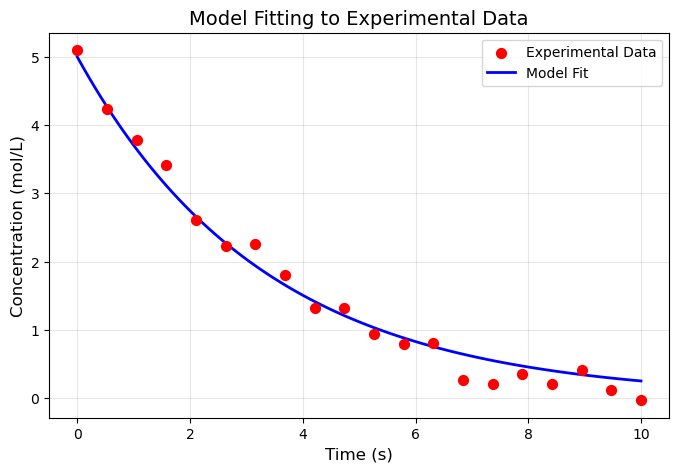

In [12]:
# Experimental data with noise
np.random.seed(42)
time_exp = np.array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])
C_exp = 5.0 * np.exp(-0.3 * time_exp) + np.random.normal(0, 0.2, 20)

# # Theoretical model
# time_model = time #np.linspace(0, 10, 100)
# C_model = 5.0 * np.exp(-0.3 * time_model)

plt.figure(figsize=(8, 5))
plt.scatter(time_exp, C_exp, s=50, color='red', 
            marker='o', label='Experimental Data', zorder=3)
# plt.plot(time_model, C_model, 'b-', linewidth=2, 
#          label='Model Fit', zorder=2)

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Concentration (mol/L)', fontsize=12)
# plt.title('Model Fitting to Experimental Data', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, zorder=1)
plt.show()

### 9.1.4 Subplots

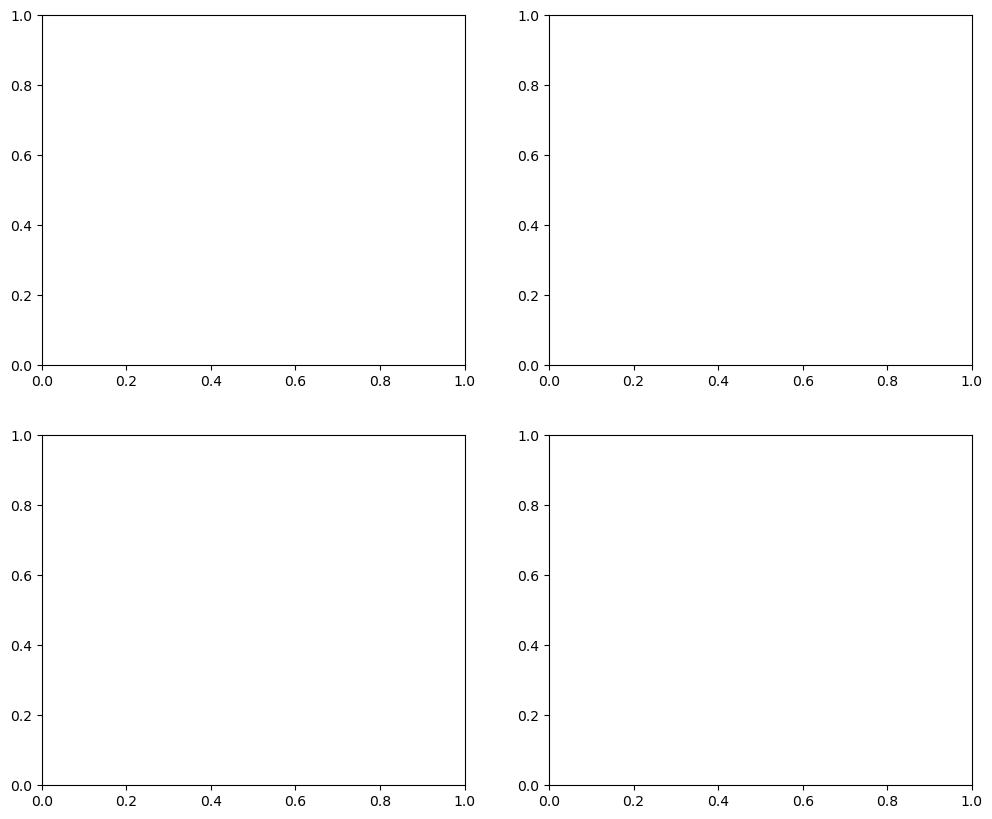

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

In [35]:
axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

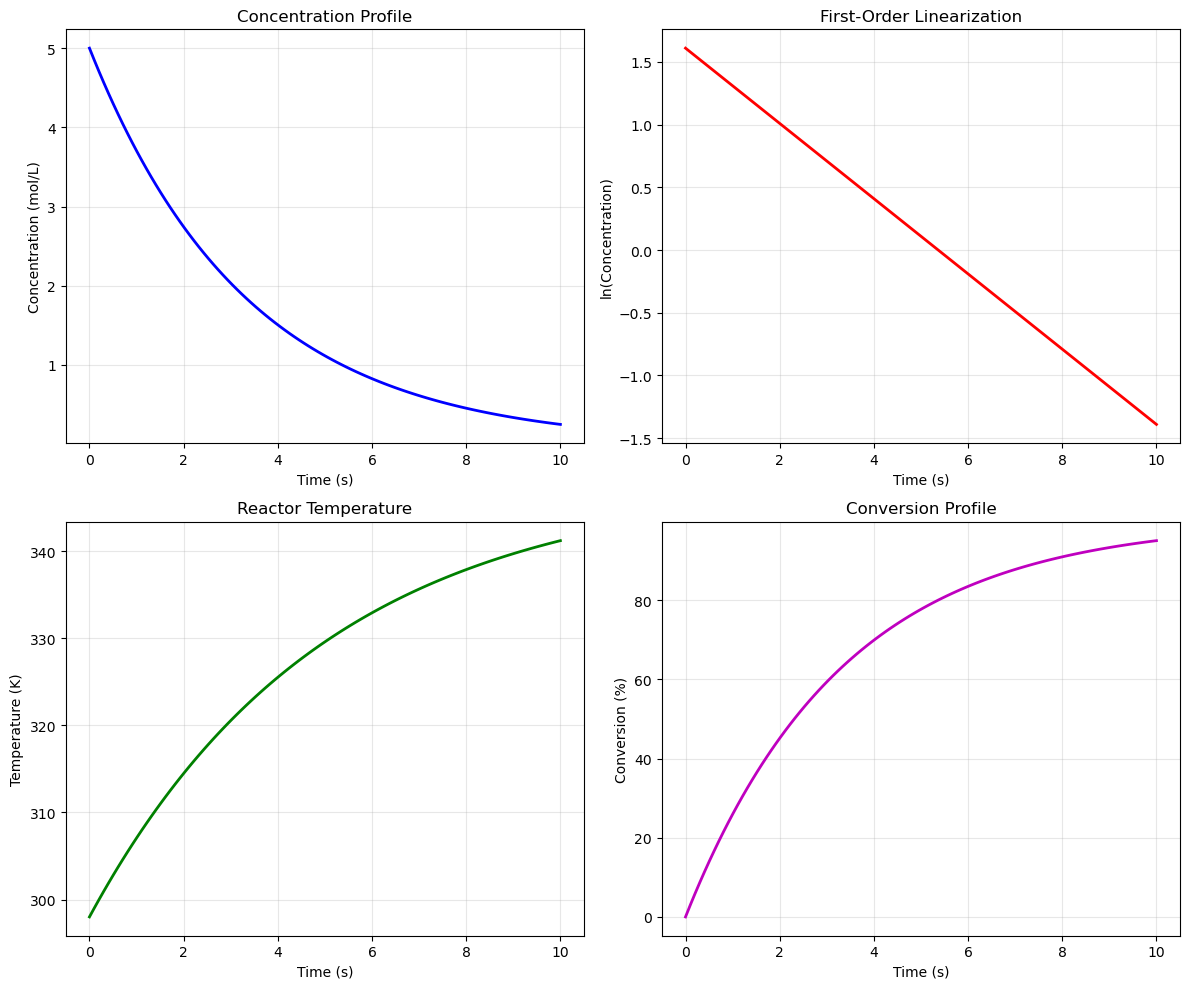

In [39]:
# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

time = time #np.linspace(0, 10, 100)

# Subplot 1: Concentration vs Time
C = 5.0 * np.exp(-0.3 * time)
axes[0, 0].plot(time, C, 'b-', linewidth=2)
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Concentration (mol/L)')
axes[0, 0].set_title('Concentration Profile')
axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: ln(C) vs Time (linearization)
axes[0, 1].plot(time, np.log(C), 'r-', linewidth=2)
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('ln(Concentration)')
axes[0, 1].set_title('First-Order Linearization')
axes[0, 1].grid(True, alpha=0.3)

# Subplot 3: Temperature profile
T = 298 + 50 * (1 - np.exp(-0.2 * time))
axes[1, 0].plot(time, T, 'g-', linewidth=2)
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Temperature (K)')
axes[1, 0].set_title('Reactor Temperature')
axes[1, 0].grid(True, alpha=0.3)

# Subplot 4: Conversion vs Time
X = 1 - np.exp(-0.3 * time)
axes[1, 1].plot(time, X * 100, 'm-', linewidth=2)
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Conversion (%)')
axes[1, 1].set_title('Conversion Profile')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 9.1.5 Bar Charts and Histograms

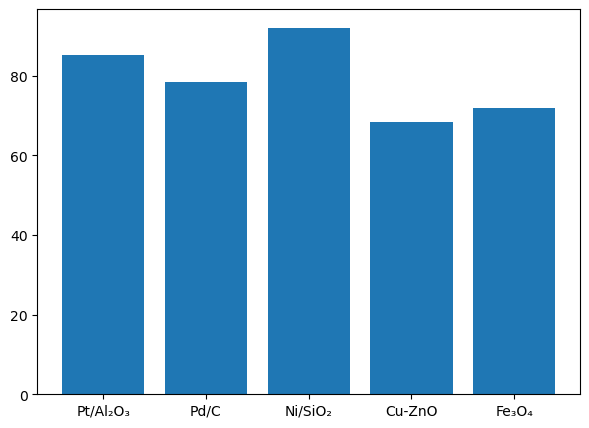

In [40]:
import numpy as np
import matplotlib.pyplot as plt
# Yield comparison for different catalysts
catalysts = ['Pt/Al₂O₃', 'Pd/C', 'Ni/SiO₂', 'Cu-ZnO', 'Fe₃O₄']
yields = [85.2, 78.5, 92.1, 68.3, 71.9]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

# -------- FIGURE 1: BAR CHART --------
plt.figure(figsize=(7,5))

bars = plt.bar(catalysts, yields)
               #color=colors,
               #edgecolor='black', linewidth=1.5)

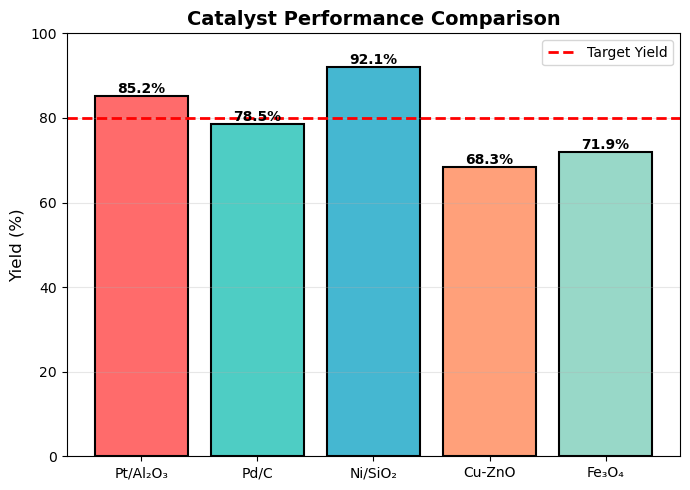

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# Yield comparison for different catalysts
catalysts = ['Pt/Al₂O₃', 'Pd/C', 'Ni/SiO₂', 'Cu-ZnO', 'Fe₃O₄']
yields = [85.2, 78.5, 92.1, 68.3, 71.9]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

# -------- FIGURE 1: BAR CHART --------
plt.figure(figsize=(7,5))

bars = plt.bar(catalysts, yields, color=colors,
               edgecolor='black', linewidth=1.5)

plt.ylabel('Yield (%)', fontsize=12)
plt.title('Catalyst Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 100)

plt.axhline(y=80, color='red', linestyle='--',
            linewidth=2, label='Target Yield')

plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

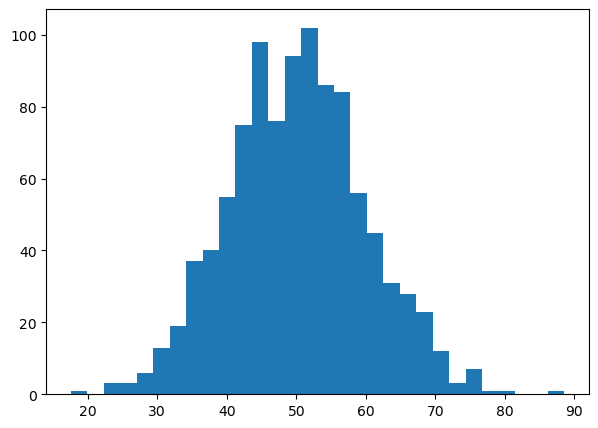

In [45]:
# -------- FIGURE 2: HISTOGRAM --------
np.random.seed(42)
particle_sizes = np.random.normal(50, 10, 1000)

plt.figure(figsize=(7,5))

plt.hist(particle_sizes, bins=30)
    # color='steelblue',
         # edgecolor='black',
         # alpha=0.7)
plt.show()

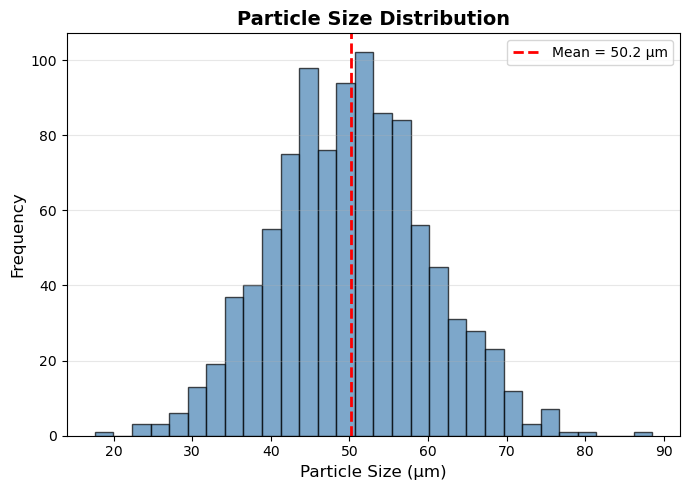

In [46]:
# -------- FIGURE 2: HISTOGRAM --------
np.random.seed(42)
particle_sizes = np.random.normal(50, 10, 1000)

plt.figure(figsize=(7,5))

plt.hist(particle_sizes, bins=30,
         color='steelblue',
         edgecolor='black',
         alpha=0.7)

plt.xlabel('Particle Size (μm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Particle Size Distribution', fontsize=14, fontweight='bold')

mean_val = np.mean(particle_sizes)
plt.axvline(x=mean_val, color='red',
            linestyle='--', linewidth=2,
            label=f'Mean = {mean_val:.1f} μm')

plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

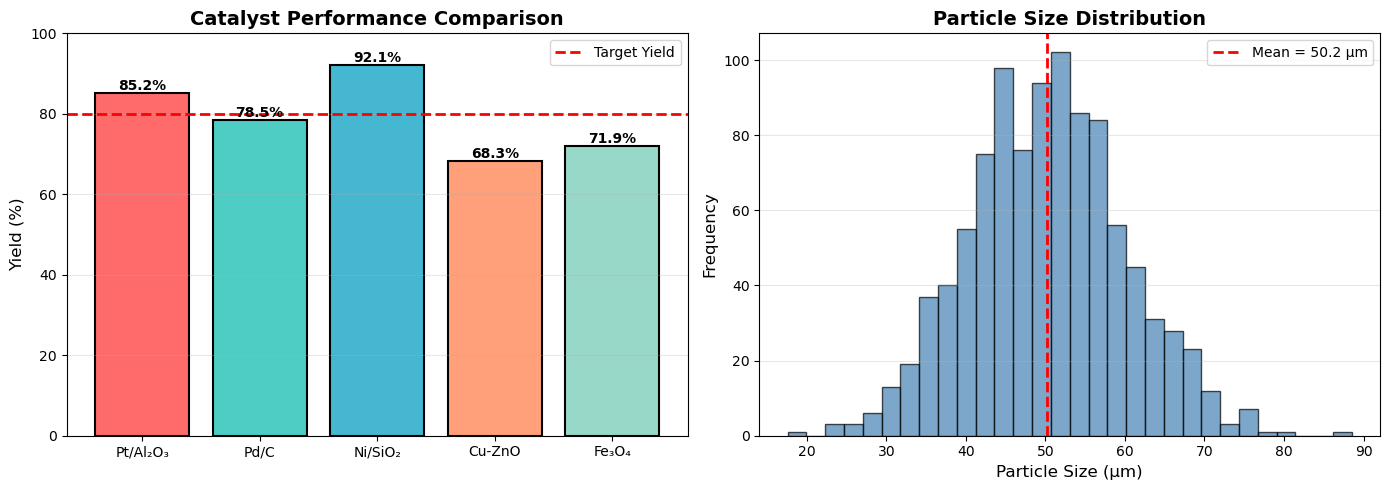

In [47]:
# Yield comparison for different catalysts
catalysts = ['Pt/Al₂O₃', 'Pd/C', 'Ni/SiO₂', 'Cu-ZnO', 'Fe₃O₄']
yields = [85.2, 78.5, 92.1, 68.3, 71.9]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
bars = ax1.bar(catalysts, yields, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Yield (%)', fontsize=12)
ax1.set_title('Catalyst Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 100)
ax1.axhline(y=80, color='red', linestyle='--', linewidth=2, label='Target Yield')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Histogram of particle sizes
np.random.seed(42)
particle_sizes = np.random.normal(50, 10, 1000)  # μm

ax2.hist(particle_sizes, bins=30, color='steelblue', 
         edgecolor='black', alpha=0.7)
ax2.set_xlabel('Particle Size (μm)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Particle Size Distribution', fontsize=14, fontweight='bold')
ax2.axvline(x=np.mean(particle_sizes), color='red', 
           linestyle='--', linewidth=2, label=f'Mean = {np.mean(particle_sizes):.1f} μm')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

(9.2)=
## 9.2 Scientific Plotting for Chemical Engineering

Scientific plots are not decorations—they are tools for communication. A well-designed figure should allow the reader to:
- Understand the scientific message quickly
- Interpret trends, comparisons, and uncertainties correctly
- Reproduce and verify the results if needed

Poor plotting choices can mislead readers, obscure important trends, or reduce the credibility of your work.

(9.2.1)=
### 9.2.1 Define the Scientific Question First

Before making any plot, ask yourself:

- What question am I trying to answer?
- What relationship am I trying to show?
- Who is the audience (yourself, classmates, reviewers, general public)?

The answers determine:

- The type of plot
- The variables shown
- The level of detail required

**Example 1**

Suppose you performed an experiment measuring how **temperature affects the solubility of salt in water**.  

- **Scientific Question:** How does solubility change with temperature?  
- **Relationship to show:** Solubility (g/100 mL) vs. Temperature (°C)  
- **Audience:** Classmates learning basic chemistry  

**Decisions for plotting:**

- Plot type → Line plot (continuous variable: temperature)  
- X-axis → Temperature (°C)  
- Y-axis → Solubility (g/100 mL)  
- Include error bars → If measurements have uncertainty  

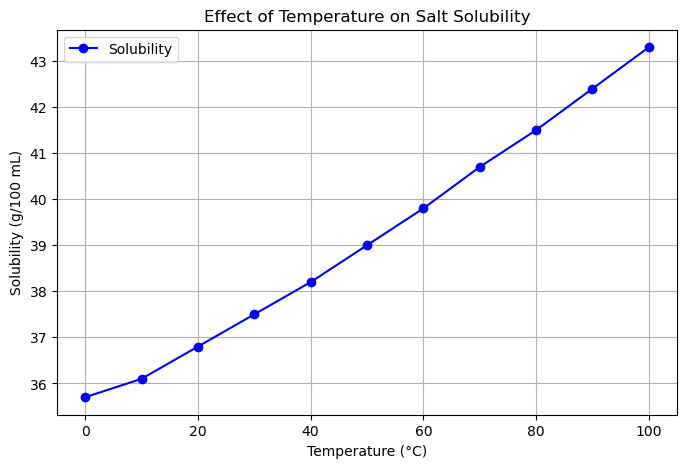

In [48]:
import matplotlib.pyplot as plt

# Sample data: Temperature (°C) vs Solubility (g/100 mL water)
temperature = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
solubility = [35.7, 36.1, 36.8, 37.5, 38.2, 39.0, 39.8, 40.7, 41.5, 42.4, 43.3]

# Create a line plot
plt.figure(figsize=(8,5))
plt.plot(temperature, solubility, marker='o', linestyle='-', color='b', label='Solubility')

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Solubility (g/100 mL)')
plt.title('Effect of Temperature on Salt Solubility')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

**Example 2**


Suppose you performed a simulation measuring the temperature distribution across a heated square plate.
- Scientific Question: How does temperature vary across the surface of the plate?
- Relationship to show: Temperature (K) vs. spatial position (x, y)
- Audience: Classmates or lab report readers studying heat transfer

Decisions for plotting:
- Plot type → 2D filled contour plot (for regions of similar temperature)
- X-axis → x position (m)
- Y-axis → y position (m)
- Color → Temperature (K) with a colorbar
- Contour lines → Optional, for precise values
- 3D surface plot → Optional, to visualize the shape of the temperature field

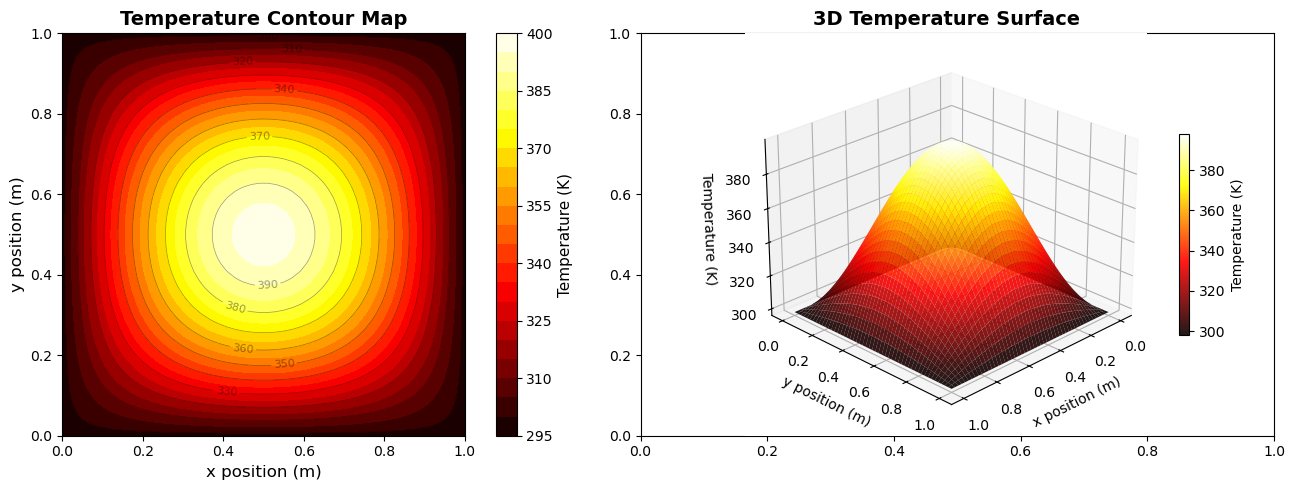

In [49]:
# 2D temperature distribution in a heated plate
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)

# Temperature distribution (simplified heat equation solution)
T = 100 * np.sin(np.pi * X) * np.sin(np.pi * Y) + 298

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Filled contour plot
contourf = ax1.contourf(X, Y, T, levels=20, cmap='hot')
contour_lines = ax1.contour(X, Y, T, levels=10, colors='black', 
                            linewidths=0.5, alpha=0.4)
ax1.clabel(contour_lines, inline=True, fontsize=8)
cbar1 = plt.colorbar(contourf, ax=ax1)
cbar1.set_label('Temperature (K)', fontsize=11)
ax1.set_xlabel('x position (m)', fontsize=12)
ax1.set_ylabel('y position (m)', fontsize=12)
ax1.set_title('Temperature Contour Map', fontsize=14, fontweight='bold')
ax1.set_aspect('equal')

# 3D surface plot
from mpl_toolkits.mplot3d import Axes3D
ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(X, Y, T, cmap='hot', edgecolor='none', alpha=0.9)
cbar2 = plt.colorbar(surf, ax=ax2, shrink=0.5)
cbar2.set_label('Temperature (K)', fontsize=10)
ax2.set_xlabel('x position (m)', fontsize=10)
ax2.set_ylabel('y position (m)', fontsize=10)
ax2.set_zlabel('Temperature (K)', fontsize=10)
ax2.set_title('3D Temperature Surface', fontsize=14, fontweight='bold')
ax2.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

(9.2.2)=
### 9.2.2 Axes: Labels, Units, and Scaling

Proper axis labels, units, and scaling are **critical for scientific plots**. They ensure the reader can interpret your data accurately and prevent miscommunication.

#### Axis Labels

- Always label both **X and Y axes** with the **variable name**.
- Include **units in parentheses**.
- Avoid vague labels such as "Value" or "Data".

**Good Example:**  
- Temperature (°C)
- Pressure (Pa)
- Time (s)

**Bad Example:**  
- Value
- Output


#### Axis Scaling

- Use **linear scales** by default for straightforward relationships.
- Use **logarithmic scales** when:
  - The data spans several orders of magnitude.
  - The relationship is multiplicative or follows a power law.
- Always label log axes clearly (e.g., "log₁₀(Concentration)").

**Never distort data** by changing axis limits just to exaggerate trends.

---

**Example: Temperature vs Pressure**

Suppose we measure the pressure of an ideal gas at different temperatures in a **constant volume container**.

Pressure (Pa) = n R T / V

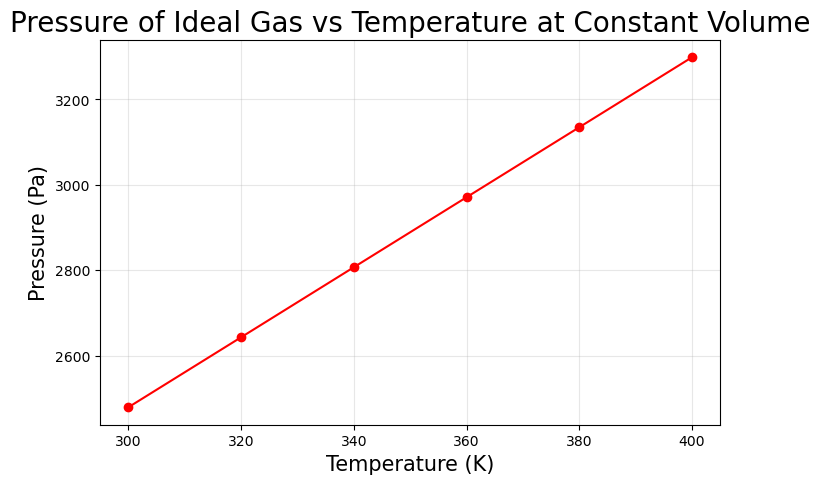

In [57]:
# Python Example: Proper Labels, Units, Scaling
import matplotlib.pyplot as plt

# Sample data (Temperature in K, Pressure in Pa)
temperature = [300, 320, 340, 360, 380, 400]  # Kelvin
pressure = [2478.9, 2642.9, 2807.0, 2971.0, 3135.0, 3299.0]  # Pa

plt.figure(figsize=(8,5))
plt.plot(temperature, pressure, marker='o', linestyle='-', color='r')

# Proper axis labels with units
plt.xlabel('Temperature (K)', fontsize=15)
plt.ylabel('Pressure (Pa)', fontsize=15)
plt.title('Pressure of Ideal Gas vs Temperature at Constant Volume', fontsize=20)
plt.grid(True, alpha=0.3)

# Linear scale by default; log scale example
# plt.yscale('log')  # Uncomment to show log scaling

plt.show()

(9.2.3)=
### 9.2.3 Error Bars and Uncertainty

In scientific data, **uncertainty is always present**. It is important to represent it clearly in your plots to communicate the **reliability of measurements**.


- **Error bars** visually show the variability of the data.
  - Common types: **standard deviation**, **standard error**, **confidence intervals**.
- Always provide a **description of what the error represents** in your figure caption or legend.
- Never hide uncertainty to make results appear more precise or "look better."

---

**Example: Measuring Growth Rate of a Culture**

Suppose we measured bacterial growth (OD600) at different time points, with 3 replicates per time:

- `time` (hours): [0, 1, 2, 3, 4, 5]  
- `OD_mean`: [0.05, 0.12, 0.30, 0.55, 0.80, 1.05]  
- `OD_std`: [0.01, 0.02, 0.03, 0.04, 0.05, 0.05]  # standard deviation

/var/folders/0w/xt4lf1l923l353q32j8pqq000000gn/T/ipykernel_96445/214675294.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


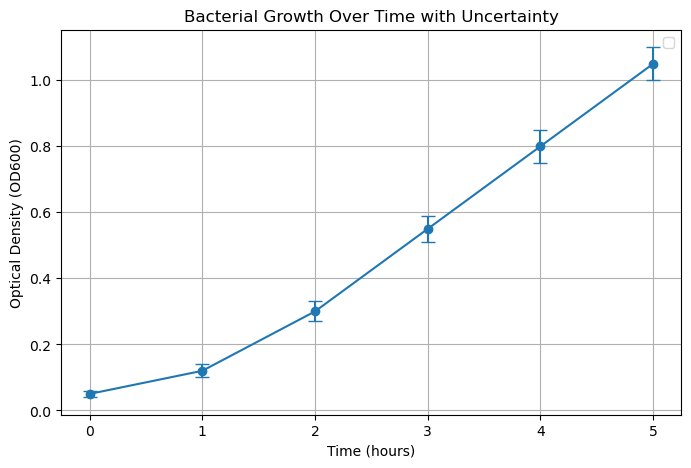

In [60]:
import matplotlib.pyplot as plt

# Data
time = [0, 1, 2, 3, 4, 5]  # hours
OD_mean = [0.05, 0.12, 0.30, 0.55, 0.80, 1.05]
OD_std = [0.01, 0.02, 0.03, 0.04, 0.05, 0.05]

# Create plot with error bars
plt.figure(figsize=(8,5))
plt.errorbar(time, OD_mean, yerr=OD_std, fmt='o-', capsize=5) #, color='g', label='OD600 ± SD')

# Labels and title
plt.xlabel('Time (hours)')
plt.ylabel('Optical Density (OD600)')
plt.title('Bacterial Growth Over Time with Uncertainty')
plt.grid(True)
plt.legend()

plt.show()

(9.3)=
## 9.3 Molecular Visualization

Visualization of molecular structures is essential for understanding chemical properties and reactions.

(9.3.1)=
### 9.3.1 2D Molecular Structures with RDKit

In [17]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 40.2 MB/s  0:00:00 eta 0:00:01


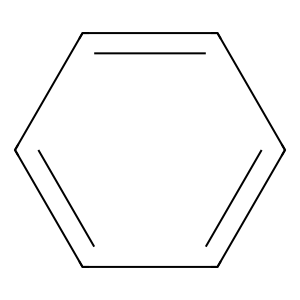

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles = 'c1ccccc1' # Benzene
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol, size=(300, 300))
display(img)

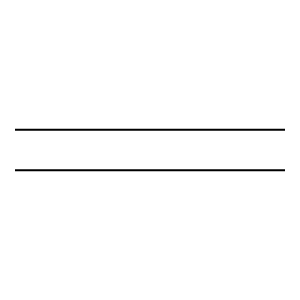

In [ ]:
smiles = 'C=C' # Ethene

mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol, size=(300, 300))
display(img)

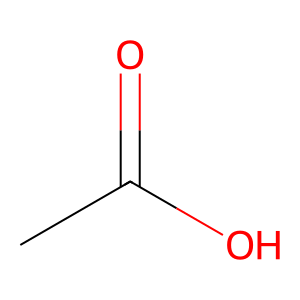

In [18]:
smiles = 'CC(=O)O' # Acetic acid

mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol, size=(300, 300))
display(img)

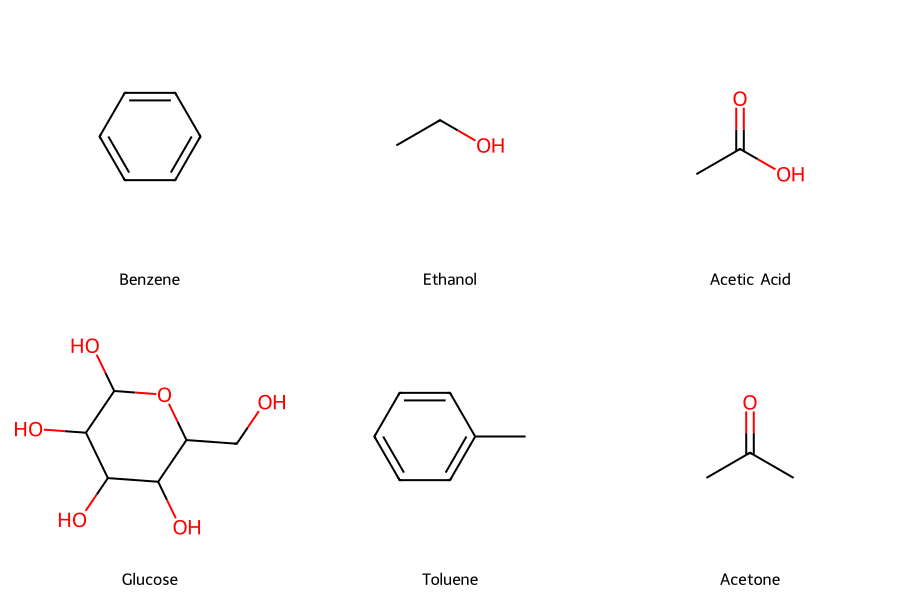

In [19]:


# Common chemical engineering molecules
molecules = {
    'Benzene': 'c1ccccc1',
    'Ethanol': 'CCO',
    'Acetic Acid': 'CC(=O)O',
    'Glucose': 'C(C1C(C(C(C(O1)O)O)O)O)O',
    'Toluene': 'Cc1ccccc1',
    'Acetone': 'CC(=O)C'
}

# Create molecule objects
mols = [Chem.MolFromSmiles(smiles) for smiles in molecules.values()]
legends = list(molecules.keys())

# Draw molecules in a grid
img = Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300, 300),
                           legends=legends, returnPNG=False)
display(img)

(9.3.2)=
### 9.3.2 3D Molecular Visualization with Py3Dmol

In [21]:
!pip install py3Dmol

In [23]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

# Create a 3D molecule (ethanol)
smiles = 'CCO'  # Ethanol
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)

# Generate 3D coordinates
AllChem.EmbedMolecule(mol, randomSeed=42)
AllChem.MMFFOptimizeMolecule(mol)

# Convert to mol block format
mol_block = Chem.MolToMolBlock(mol)

# Create 3D viewer
viewer = py3Dmol.view(width=600, height=400)
viewer.addModel(mol_block, 'mol')

# # Set style
viewer.setStyle({'stick': {'radius': 0.15}, 
                'sphere': {'radius': 0.4}})
# viewer.setBackgroundColor('white')
viewer.zoomTo()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [25]:

# Create a 3D molecule (benzene)
smiles = 'c1ccccc1'  # Benzene
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)

# Generate 3D coordinates
AllChem.EmbedMolecule(mol, randomSeed=42)
AllChem.MMFFOptimizeMolecule(mol)

# Convert to mol block format
mol_block = Chem.MolToMolBlock(mol)

# Create 3D viewer
viewer = py3Dmol.view(width=600, height=400)
viewer.addModel(mol_block, 'mol')

# # Set style
viewer.setStyle({'stick': {'radius': 0.15}, 
                'sphere': {'radius': 0.4}})
# viewer.setBackgroundColor('white')
viewer.zoomTo()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

**Key Takeaways:**
- Good visualizations communicate data clearly and effectively
- Choose the right plot type for your data and message
- Always label axes with units
- Use color and style strategically
- Make plots publication-ready with proper formatting